In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

Загрузите данные о вероятности развития сердечного приступа. Описание датасета смотрите здесь: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.

In [ ]:
cancer = load_breast_cancer()

Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, shuffle=False)

Постройте следующие модели классификации:

случайное предсказание (подбрасывание кубика)

In [ ]:
x = np.random.randint(0, 2, size=456)

логистическая регрессия (LogisticRegression);

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
fprlog, tprlog, _ = metrics.roc_curve(y_test,  y_pred)
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))
report = classification_report(y_test, y_pred)
print(report)
auc1 = metrics.roc_auc_score(y_test, y_pred)

Accuracy on the training set: 0.965
Accuracy on the test set: 0.930
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        35
           1       0.99      0.92      0.95       108

    accuracy                           0.93       143
   macro avg       0.89      0.94      0.91       143
weighted avg       0.94      0.93      0.93       143



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


метод опорных векторов с линейным ядром (SVC(kernel='linear'));

In [ ]:
svm= SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
fprsvc, tprsvc, _ = metrics.roc_curve(y_test,  y_pred)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))
report = classification_report(y_test, y_pred)
print(report)
auc2 = metrics.roc_auc_score(y_test, y_pred)

acc on train dataset: 0.908
acc on test dataset: 0.951
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.97      0.96      0.97       108

    accuracy                           0.95       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.95      0.95      0.95       143



метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

In [ ]:
# create linear discriminant model object
lda = LDA()
#train classifier
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
fprlda, tprlda, _ = metrics.roc_curve(y_test,  y_pred)
# print linear discriminant results
print('Test Accuracy = %.1f%%' % (accuracy_score(y_test, lda.predict(X_test)) * 100))
print('Train Accuracy = %.1f%%' % (accuracy_score(y_train, lda.predict(X_train)) * 100))
report = classification_report(y_test, y_pred)
print(report)
auc3 = metrics.roc_auc_score(y_test, y_pred)

Test Accuracy = 97.2%
Train Accuracy = 96.9%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.97      0.99      0.98       108

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.97       143



метод k ближайших соседей (KNeighborsClassifier с двумя классами).

In [ ]:
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))
auc4 = metrics.roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        35
           1       0.98      0.94      0.96       108

    accuracy                           0.94       143
   macro avg       0.91      0.94      0.93       143
weighted avg       0.95      0.94      0.95       143

Accuracy of the training set for 6NN: 0.946009
Accuracy of the test set for 6NN: 0.930070


На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

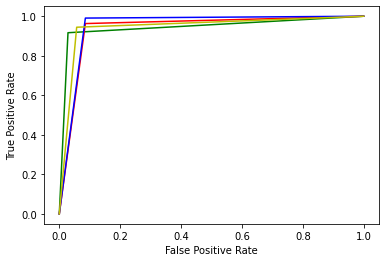

In [ ]:
plt.plot(fprlog, tprlog, 'g')
plt.plot(fprsvc, tprsvc, 'r')
plt.plot(fprlda, tprlda, 'b')
plt.plot(fprknn, tprknn, 'y')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.

In [ ]:
print(sorted([auc1, auc2, auc3, auc4]))

[0.9386243386243385, 0.9436507936507936, 0.9440476190476189, 0.9525132275132274]
